<center><h2>Finding the Best Markets to Advertise In</h2></center>

<center><h3>Search for markets to promote content related to Web Development and Mobile Development for an E-Learning Company</h3></center>

The objective of this project is to strengthen statistical skills such as - summarizing distributions, measuring variability of a distribution, and understanding of z-scores. The project will help in combining these skills together to perform practical statistical data analysis.

<b>Project-Case-Scenario: </b> An E-Learning company offers courses on programming spanning multiple domains - web/mobile development, game development, data science etc. The company wants to identify the best markets to invest in advertising, in order to promote it's products and create a consumer base with learners/ coders.

<b>Approach Taken: </b>To identify the best markets to promote the courses, following becomes pre-requisite information about the potential learners, for the E-Learning company:
- What people actually want to study - most preferred courses/ roles?
- What is the economic investment range - how much money, learners are willing to invest in online education?
- Investments in terms of time - the duration of time learners would like to spend in courses.
- Demographic information such as their current residence, current employment status and its type, educational qualifications etc.
    
<b>Survey Data Set: </b>The above and related information was collected by the E-Learning platform [freeCodeCamp](https://www.freecodecamp.org/) in a survey, they conducted in 2017. Since the freeCodeCamp runs [a popular Medium Publication](https://www.freecodecamp.org/news/) with over 400,000 followers, they received responses from coders/ learners with diversified interests and not just web development. They made the results as well as the data of this survey available under free distribution license.

The e-learning company intends to utilize this survey data, instead of conducting a new one - for both economic reasons and also the variety of responses available in dataset. 

The dataset can be accessed from the git repository [here](https://github.com/freeCodeCamp/2017-new-coder-survey).

<b>Sample or Population?</b> Whether this data has been considered as population or sample data - will be answered during the workflow. <font color = blue><i>One reason to keep scrolling!</i></font>

## Import the libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "dark", font_scale = 1.2, palette = "Dark2_r")

import re

#magic line
%matplotlib inline

# to avoid display of truncated columns 
pd.options.display.max_columns = 140
pd.options.display.max_colwidth = 50

## Read the data

The following columns are ID or survey timestamp related columns and hence dropped at the onset: 
 - ID.x 
 - ID.y
 - NetworkID 
 - Part1EndTime
 - Part1StartTime
 - Part2EndTime
 - Part2StartTime

In [2]:
# read in dataset and store in a dataframe
fcc_survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", encoding = "latin-1", low_memory=False)

# drop un-necessary columns from the dataset
fcc_survey.drop(columns = ["ID.x", "ID.y", "NetworkID", "Part1EndTime", 
                           "Part1StartTime", "Part2EndTime", "Part2StartTime"], axis = 1, inplace = True)

# display number of rows and columns in dataset
print("Total Rows in survey data :",fcc_survey.shape[0])
print("Total Columns in survey data :",fcc_survey.shape[1])

Total Rows in survey data : 18175
Total Columns in survey data : 129


## Size the data - non empty rows

The below plot summarizes the actual amount of non-null values present in each of the column of the dataset.

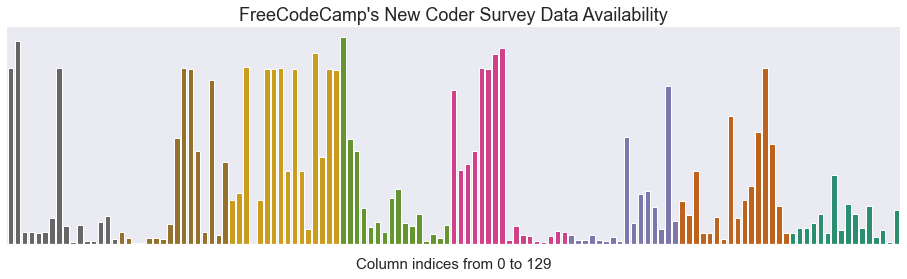

In [3]:
# Plot the non-null proportion of each column

fig, ax = plt.subplots(figsize = (16, 4))
sns.barplot(x = fcc_survey.columns, y = fcc_survey.notnull().sum(), ax = ax, palette = "Dark2_r")
ax.set_xticklabels([])
ax.set_xlabel("Column indices from 0 to 129", fontsize = 15)
ax.set_title("FreeCodeCamp's New Coder Survey Data Availability", fontsize = 18)
ax.set_yticklabels([])
ax.set_yticks([False])
ax.set_xticks([False])
sns.despine(top=True, right=True, left=True)
plt.show()

There seems to be lot of columns with empty/ null values. Perhaps familiarity with each of the column and what exactly it captures will help in identifying which fields are useful for the analysis and which fields can be ignored.

### First 5 records from dataset

In [4]:
fcc_survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Devel

## Identify relevant fields for analysis

For the analysis, out of the 129 columns present in dataset, the relevant columns are the ones that can provide information about the coder's:
- subject interests
- willing to invest in education and the extent of budget
- current geographic location
- preferred language for communication and/or some related information 

Although at this point, certain fields may still <u>not</u> be required for objective of the project, but they might be useful for additional analysis of the data and hence included.

Some of the relevant Columns are (respective actual field names are less formatted):

- Age
- Country Citizen
- Country Live
- Employment Field
- Employment Status
- Hours Learning
- Job Role Interest
- Language At Home
- Money For Learning
- Months Programming	

## Check for Sample Representativity

For the analysis of best markets to promote the online courses, it is essential to understand if the potential coders/ learners are actually interested in learning the subjects/ courses that the E-Company offers. 

This is required as without a representative population, this analysis will hold no true value. The dataset should be able to answer:

- Are coders interested in Web and/or Mobile development courses
- Are coders interested in more than these two courses which are also provided by E-Company

### Transform "Job Role Interest" column for better readability

The transformation for role values is required, to avoid same subjects marked as different. For example: **Full-Stack Developer** and **Full stack developer** will be updated to **full stack developer**. 

This transformation is *conditional and extremely basic*. For example the following scenarios, need thorough data clean up. But due to existent lack of data for this column, these scenarios <u>have not been considered</u> for transformation:

- answers like 
    - "all   whatever is required to develop tools to revolutionize the mechanical engineering process" or
    - "i don't know what the difference is between most of these soz lol" or
    - "i'm just learning code to increase my skill set. i see it as a literacy issue."
- system engineer or systems engineer 
- full stack developer or full stack development etc.

In [5]:
print("Total coders who responded for Job Role Interests:",fcc_survey["JobRoleInterest"].notnull().sum())

print("Total coders who responded for Job Role Interests (%):",
      int(fcc_survey["JobRoleInterest"].notnull().sum()/fcc_survey.shape[0] * 100))

Total coders who responded for Job Role Interests: 6992
Total coders who responded for Job Role Interests (%): 38


In [6]:
"""
transform_roles function will take each value/ list of the roles answered by a coder, 
convert into lower case and replace any additional characters that differentiate same subjects
"""
def transform_roles(in_row):
    role_list = []
    if in_row is not np.nan:
        for each_val in in_row.split(","):
            role_list.append(each_val.replace(r"  "," ").replace("-"," ").strip().lower())
#             role_list.append(each_val.replace("development", "developer"))
        in_row = role_list
    return in_row

fcc_survey["JobRoleInterest"] = fcc_survey.JobRoleInterest.apply(transform_roles)

pd.options.display.max_colwidth = 120
# display first 5 records after transformation as sample
print("Sample rows after transformation", "\n")
print(fcc_survey["JobRoleInterest"].head(), "\n")

pd.options.display.max_colwidth = 50

Sample rows after transformation 

0                                                                                                                    NaN
1                                                                                             [full stack web developer]
2       [front end web developer, back end web developer, devops / sysadmin, mobile developer, full stack web developer]
3                                            [front end web developer, full stack web developer, back end web developer]
4    [full stack web developer, information security, mobile developer, front end web developer, back end web developer]
Name: JobRoleInterest, dtype: object 



The below code is to prepare for plots to visualize number of courses coders have shown interests in and to get a general idea of the most preferred roles.

In [7]:
"""
Total number of subjects/ roles the coders has shown interest to learn
"""
RolesCount = (
fcc_survey["JobRoleInterest"].apply(lambda x: len(x) 
                                    if x is not np.nan else np.nan).value_counts(normalize = True).mul(100).round(2)
)

"""
Number of times a particular subject/ role has been cited by the coders
"""
roles_dict = {}
for row in fcc_survey["JobRoleInterest"]:
    if row is not np.nan:
        for each_role in row:
            if each_role in roles_dict:
                roles_dict[each_role] += 1
            else:
                roles_dict[each_role] = 1

TopRoles = pd.DataFrame(roles_dict.items())
TopRoles.rename(columns = {0 : "RoleName", 1: "Count"}, inplace = True)

# Compute contribution of each subject percentage wise
TopRoles["Count%"] = (TopRoles["Count"]/ TopRoles["Count"].sum()).mul(100).round(2)

# Select only the top most sought out courses
TopRoles = TopRoles.sort_values("Count%", ascending = False)[:10]

### Visualize No. of courses Coders are Interested to Learn & Most preferred Courses

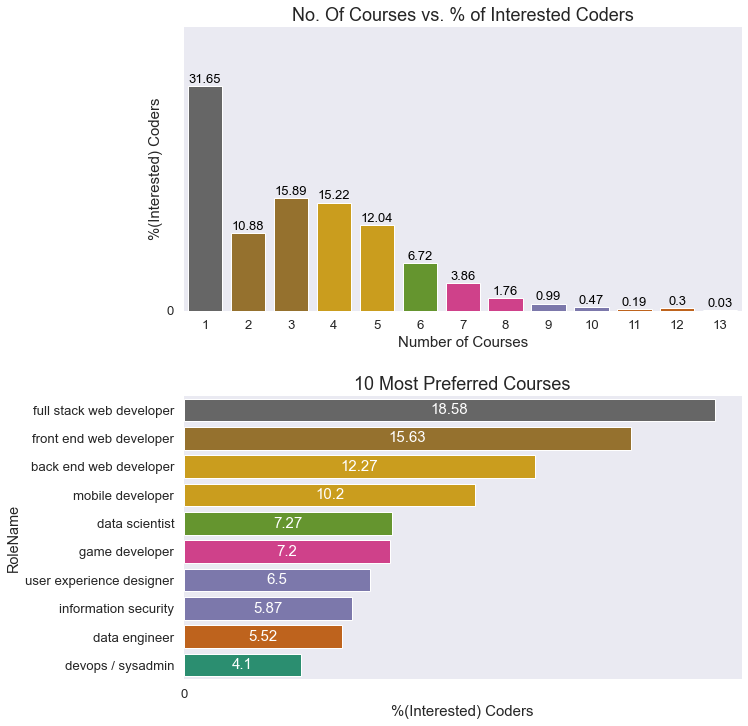

In [8]:
fig, ax = plt.subplots(figsize = (10, 12), nrows = 2)

# plot number of courses
sns.barplot(x = RolesCount.index.astype(int), y = RolesCount, ax = ax[0], palette = "Dark2_r")

# plot most preferred courses
sns.barplot(y = TopRoles.RoleName, x = TopRoles["Count%"], ax = ax[1], palette = "Dark2_r")

ax[0].set_ylabel("%(Interested) Coders", fontsize = 15)
ax[0].set_xlabel("Number of Courses", fontsize = 15)
ax[0].set_title("No. Of Courses vs. % of Interested Coders", fontsize = 18)
ax[0].set_yticks([False])
ax[0].set_ylim([0, 40])

ax[1].set_xticks([False])
ax[1].set_xlabel("%(Interested) Coders", fontsize = 15)
ax[1].set_title("10 Most Preferred Courses", fontsize = 18)

sns.despine(top=True, right=True, left=True, bottom=True)

for index, row in RolesCount.items():
    ax[0].text(index - 1, row + 0.5, row, color='black', ha="center", fontsize = 13)
    
for p in ax[1].patches:
    w, h = p.get_width(), p.get_height()
    ax[1].text(w * .5, p.get_y() + 0.5 * h, w, ha='center', va='center', fontsize = 15, color = "white")    

plt.subplots_adjust(hspace = 0.3)
plt.show()

Observations based on the above distributions, can be summarized as:
- Close to 31% of total coders who answered this survey question, would prefer atleast 1 course.
- Collectively about 52% of coders would prefer to learn 2 to 5 courses.
- The top 3 of the most preferred courses include some or the other web development related courses.
- The 10 most preferred courses also include - mobile development, data science and game development courses.

### Identify coders interested in atleast one role - Web Developer or Mobile Developer

The No. of Courses distribution does provide us the information that learners are interested in more than one subject. The Top most preferred distribution provides information on various courses that coders are interested. 

It can be easily understood that front end web developer and full stack web developer can be considered specialization under broader term "Web Developer". For now, since the data hasn't undergone thorough cleaning process, the responses have been categorized into two:
- Web or Mobile - where coders have mentioned atleast one of the two roles
- and Others - where neither of the role has been mentioned 

In [9]:
# dummy_pattern = re.compile(r"web\sdev|mobile\sdev")

"""
search_web_mob function : searches for "web dev" or "mobile dev" in the list of roles and classifies as "web or mobile"
                          if either of the two roles are found else returns "others"
"""
def search_web_mob(in_list):
    web_p = re.compile(r"(web\sdeve|mobile\sdeve)")
    if in_list is not np.nan:
        new_list = list(filter(web_p.search, in_list))
        if len(new_list) > 0:
            return "web or mobile"
        else:
            return "others"

fcc_survey["WebOrMobDev"] = fcc_survey["JobRoleInterest"].apply(search_web_mob)

### Visualize interest in Two Subjects - Web Development and Mobile Development

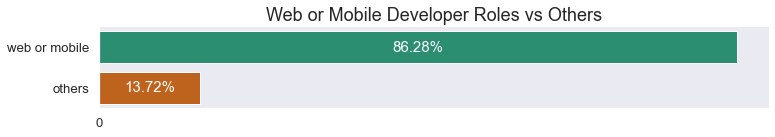

In [10]:
fig, ax = plt.subplots(figsize = (12, 1.5))

sns.barplot(ax = ax, y = fcc_survey["WebOrMobDev"].value_counts().index, 
            x = fcc_survey["WebOrMobDev"].value_counts(normalize = True), palette = "Dark2")
for p in ax.patches:
    w, h = p.get_width(), p.get_height()
    ax.text(w * .5, p.get_y() + 0.5 * h, str(round(w*100,2))+"%",
            ha='center', va='center', fontsize = 15, color = "white")

ax.set_title("Web or Mobile Developer Roles vs Others", fontsize = 18)
ax.set_xticks([False])
ax.set_xlabel("")
sns.despine()
plt.show()

<i>Most of the respondent are interested in web and/or mobile development skills.</i>
    
<i>To answer the representativity of the dataset - based on the above results, it can be concluded that this dataset is respresentative of the population of respondents the E-Company is looking for and hence is valid for further analysis.</i>

### New Coders - Locations and Densities

Two distinct columns in dataset provide information related to a coders geographic location - "Country Citizen" and "Country Live" - coder's native and current residence.

The E-Company is only interested in the current location of the coders. Hence the country a coder is currently living at, can be considered as an individual market. 

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If the ads manage to convince 10% of the 5000 potential customers in market A to buy E-Company's product, then it is better than convincing 100% of the 30 potential customers in market B.

For the analysis, only those coders have been considered who have answered to the Job Role preference.

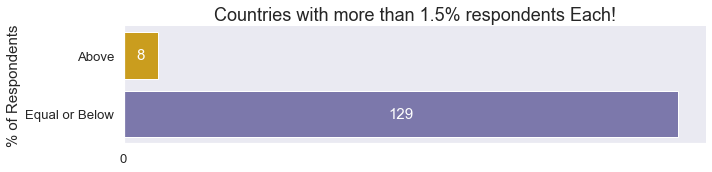

In [11]:
# drop all rows where coders haven't responded to preferred Job Role Interest Question
fcc_survey = fcc_survey.dropna(subset = ["JobRoleInterest"])

fig, ax = plt.subplots(figsize = (10, 2.5))

# group countries each having more and equal or less than 1.5% of coder population
sns.barplot(y = ["Above", "Equal or Below"], 
            x = [(fcc_survey["CountryLive"].value_counts(normalize = True) > 0.015).sum(),
                 (fcc_survey["CountryLive"].value_counts(normalize = True) <= 0.015).sum()],
            palette = "Dark2_r")

ax.set_title("Countries with more than 1.5% respondents Each!", fontsize = 18)
ax.set_ylabel("% of Respondents", fontsize = 15)
ax.set_xticks([False])
for p in ax.patches:
    w, h = p.get_width(), p.get_height()
    ax.text(w * 0.5, p.get_y() + 0.4, int(w), fontsize = 15, color = "white",  
            ha = "center", va = "center")
    
sns.despine()
plt.tight_layout()
plt.show()

In order to have a summarized view, the countries have been grouped together:
- There are 8 countries, with each country having more than 1.5% of total respondents.
- A total of 129 countries each, have shown responses from 1.5% or below, of the total coders who attempted the survey.

### Distribution of coders in the 8 Countries

The following distribution is only to have a granular view for the top 8 countries. The plot and data describe the percentage contribution of coder population for the 8 countries.

In [12]:
# pip install pywaffle

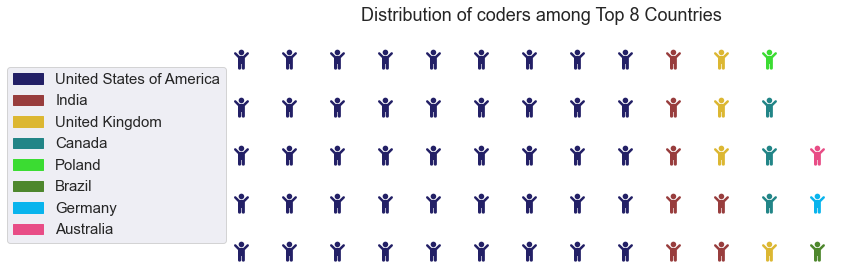

United States of America:45
India:7
United Kingdom:4
Canada:3
Poland:1
Brazil:1
Germany:1
Australia:1


In [13]:
from pywaffle import Waffle
data = dict(fcc_survey["CountryLive"].value_counts(normalize = True).mul(100).astype(int)[:8])

fig = plt.figure(FigureClass=Waffle, rows = 5, values = data, icons = "child", icon_size = 20, 
                 legend = {"loc":"right", "bbox_to_anchor": (0,0.45), "fontsize": 15},
                 colors=("#232066", "#983D3D", "#DCB732", "#228587", "#3bdc32", "#4e872d", "#09b4ed", "#e84d86"),
                 figsize = (12,5))
plt.title("Distribution of coders among Top 8 Countries", fontsize = 18)
plt.show()

for k,v in data.items():
    print(k + ":" + str(v))

Even with top 8 countries, the dataset is right skewed with maximum survey respondents residing in the USA. The next three countries with substantial number of coders, are India, UK and Canada.

<b> The search for potential markets can be narrowed down to these four countries - USA, India, UK & Canada. However, in order to factor in profitability from these markets, a deeper understanding of investment potential of coders is required.</b>

## Interested to Learn - Yes, Willing to Invest - ?

Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for the E-Company. To understand the profit potential of the Four markets, the investment potential of coders needs to be analysed.

For the analysis two columns are most useful:
- "Money for Learning" - the amount of money spent by participants from the moment they started coding until the moment they completed the survey (the currency in dataset is USD).
- "Months Programming" - the number of months spent by participants to code till the time they completed the survey.

### Calculate amount spent per month by coders

In [14]:
fcc_survey = fcc_survey[fcc_survey["CountryLive"].isin(["United States of America", "India", "United Kingdom", "Canada"])]
"""
"MonthsProgramming" has been assigned 1 in case the participant has responded with 0 as value
"""
fcc_survey.loc[fcc_survey["MonthsProgramming"] == 0, "MonthsProgramming"] = 1

# New column for amount of money spent by coder per month
fcc_survey["InvestPerMonth"] = fcc_survey["MoneyForLearning"]/ fcc_survey["MonthsProgramming"]

"""
Restrict survey data to rows with non-null values for InvestPerMonth
"""
fcc_survey = fcc_survey.dropna(subset = ["InvestPerMonth"])

### Compare average amount spent per month for the 4 markets

In [15]:
pd.DataFrame(fcc_survey.groupby("CountryLive").InvestPerMonth.mean().sort_values())

,InvestPerMonth
CountryLive,
United Kingdom,45.534443
Canada,113.510961
India,135.100982
United States of America,227.997996


<i>The above results do highlight, that coders are willing to invest monetarily as well. What stands out, is the average amount spent by coders from India is relatively higher than countries like Canada and the UK. To certain extent, this indicates presence of outliers within the data.</i>

## Identify extreme outliers

Taking account of few socio-economical metrics like [GDP per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita\#Lists_of_countries_and_dependencies), 
it would be intuitive to expect people in the UK and Canada to spend more on learning than people in India.

Since the results are otherwise, either there is lack of enough representative data for the three countries or the data has some outliers, or the data could really be correct.

### Identify the outliers - Violin and Boxplot Visualizations 

One of the primary methods to detect outliers is using the InterQuartile Deviation method [(IQD)](https://docs.oracle.com/cd/E17236_01/epm.1112/cb_statistical/frameset.htm?ch07s02s10s01.html). This method is used by violin and boxplots as well, highlighting the outliers from the median dispersion of the data.

[More on IQD](https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32)

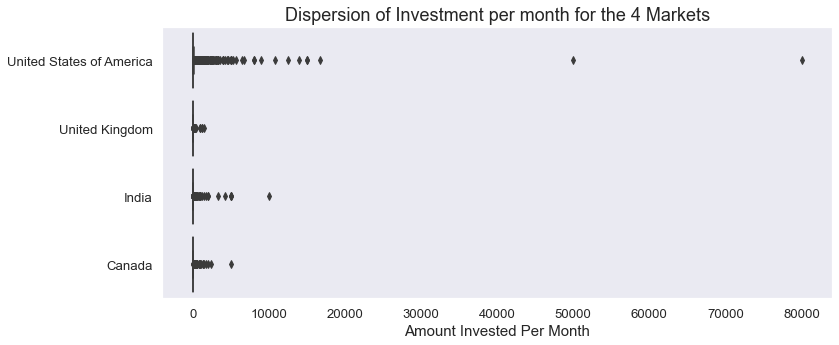

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 5))
sns.boxplot(ax = ax, y = "CountryLive", data = fcc_survey, x = "InvestPerMonth")
ax.set_ylabel("") #"Markets", fontsize = "large")
ax.set_xlabel("Amount Invested Per Month", fontsize = 15)
ax.set_title("Dispersion of Investment per month for the 4 Markets", fontsize = 18)
plt.show()

USA shows two extremely high value for Investments made per month. Although possible, these values seem unlikely and hence are  eliminated outright.

In [17]:
# filter dataframe with Invest Per Month values below 20000 USD
fcc_survey = fcc_survey[fcc_survey.InvestPerMonth < 20000]

In [18]:
"""Isolated boxplot visualization for each market - just for learning with fun"""
# fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (18, 5.5))

# markets = ["United States of America", "India", "Canada", "United Kingdom"]

# for each in markets:
#     ax_pos = markets.index(each)
#     sns.violinplot(y = fcc_survey.loc[fcc_survey["CountryLive"] == each, "InvestPerMonth"], orient = "v", 
#                 ax = axes[ax_pos], palette = "Dark2")
#     axes[ax_pos].set_title(str(each), color = "Red", fontsize = "large")
#     axes[ax_pos].set_ylabel("")

# plt.suptitle("Dispersion of Investment per Month for the 4 Markets At Individual Scale", fontsize="xx-large")
# plt.show()

'Isolated boxplot visualization for each market - just for learning with fun'

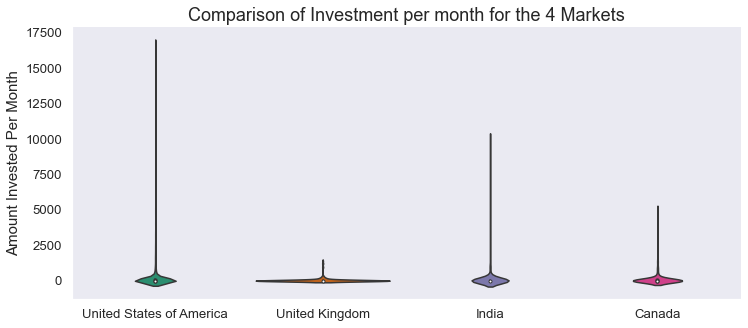

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 5))

sns.violinplot(ax = ax, x = "CountryLive", data = fcc_survey, y = "InvestPerMonth", palette = "Dark2")

ax.set_xlabel("") #"Markets", fontsize = 15)
ax.set_ylabel("Amount Invested Per Month", fontsize = 15)
ax.set_title("Comparison of Investment per month for the 4 Markets", fontsize = 18)

# ax.set_ylim(-500, 4000)
sns.despine()
plt.show()

Boxplots highlight the outliers for individual market. 
The most intriguing observation here is, that even though UK has few outliers, they still do not exceed the lowest outliers present in India or Canada.

### Examine outliers for India

This small analysis is to confirm the outliers are really outliers for the country India. The analysis is based on the assumption, that the coder may have participated in boot camps or tech events. Since these camps and events might require course or registration fees the same can be considered as investments.  The threshold value for this analysis has been set to 2500 USD.

In [20]:
# dropna to avoid any columns which have nodata
fcc_survey.loc[(fcc_survey.InvestPerMonth >= 2500) & (fcc_survey.CountryLive == "India")].dropna(axis = 1)

,Age,AttendedBootcamp,CityPopulation,CountryCitizen,CountryLive,EmploymentStatus,ExpectedEarning,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasServedInMilitary,HoursLearning,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,JobApplyWhen,JobPref,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,WebOrMobDev,InvestPerMonth
1728,24.0,0.0,"between 100,000 and 1 million",India,India,A stay-at-home parent or homemaker,70000.0,male,0.0,0.0,1.0,0.0,30.0,0.0,0.0,0.0,Within the next 6 months,work for a startup,"[user experience designer, mobile developer, p...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,bachelor's degree,Computer Programming,web or mobile,5000.000000
1755,20.0,0.0,more than 1 million,India,India,Not working and not looking for work,100000.0,male,0.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,I haven't decided,work for a multinational corporation,"[information security, full stack web develope...",no preference,Hindi,"single, never married",50000.0,15.0,bachelor's degree,Computer Science,web or mobile,3333.333333
7989,28.0,0.0,"between 100,000 and 1 million",India,India,Employed for wages,500000.0,male,1.0,1.0,1.0,0.0,20.0,0.0,0.0,0.0,more than 12 months from now,work for a multinational corporation,"[user experience designer, back end web develo...",in an office with other developers,Marathi,married or domestic partnership,5000.0,1.0,bachelor's degree,Aerospace and Aeronautical Engineering,web or mobile,5000.000000
8126,22.0,0.0,more than 1 million,India,India,Not working but looking for work,80000.0,male,1.0,0.0,1.0,0.0,80.0,0.0,0.0,0.0,I'm already applying,work for a startup,"[back end web developer, full stack web develo...",in an office with other developers,Malayalam,"single, never married",5000.0,1.0,bachelor's degree,Electrical and Electronics Engineering,web or mobile,5000.000000
13398,19.0,0.0,more than 1 million,India,India,Unable to work,100000.0,male,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,I haven't decided,work for a multinational corporation,[mobile developer],no preference,Hindi,"single, never married",20000.0,2.0,bachelor's degree,Computer Science,web or mobile,10000.000000
15587,27.0,0.0,more than 1 million,India,India,Employed for wages,65000.0,male,1.0,1.0,1.0,0.0,36.0,0.0,0.0,0.0,I haven't decided,work for a startup,"[full stack web developer, data scientist]",from home,Hindi,"single, never married",100000.0,24.0,bachelor's degree,Communications,web or mobile,4166.666667


There is a lack of information for the attended camps or events (if any) for these coders. Also, to consider they might have included Student Loan as investments, that information is also missing. Since the validity of the data can't be established for now, these values will be treated as outliers.

### Examine outliers for Canada

In [21]:
fcc_survey[(fcc_survey.InvestPerMonth >= 2500) & (fcc_survey.CountryLive == "Canada")].dropna(axis = 1)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,CityPopulation,CodeEventConferences,CodeEventFCC,CodeEventMeetup,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,ExpectedEarning,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataSci,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestMobile,JobInterestProjMngr,JobInterestUX,JobPref,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,PodcastNone,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceFCC,ResourceSO,ResourceW3S,SchoolDegree,SchoolMajor,YouTubeFCC,YouTubeMIT,WebOrMobDev,InvestPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,more than 1 million,1.0,1.0,1.0,1.0,30 to 44 minutes,Canada,Canada,finance,Employed for wages,60000.0,male,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,work for a multinational corporation,"[mobile developer, full stack web developer, d...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,bachelor's degree,Finance,1.0,1.0,web or mobile,5000.0


Taking 2500 USD as threshold, there is only one outlier for Canada data. The coder has responded in positive for boot camp training, but no information is available for any kind of student debt or loan. This could be case of lump-sum fees paid for a course/ boot camp instead of subscription based model.

### Examine outliers for USA

In [22]:
fcc_survey[(fcc_survey.InvestPerMonth >= 10000) & (fcc_survey.CountryLive == "United States of America")].dropna(axis = 1)

,Age,AttendedBootcamp,CityPopulation,CountryCitizen,CountryLive,EmploymentStatus,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasServedInMilitary,HoursLearning,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,JobApplyWhen,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,WebOrMobDev,InvestPerMonth
3930,31.0,0.0,"between 100,000 and 1 million",United States of America,United States of America,Not working and not looking for work,male,1.0,0.0,1.0,0.0,50.0,1.0,0.0,0.0,Within the next 6 months,work for a startup,1.0,"[devops / sysadmin, front end web developer, f...",no preference,English,married or domestic partnership,65000.0,6.0,bachelor's degree,web or mobile,10833.333333
6805,46.0,1.0,"between 100,000 and 1 million",United States of America,United States of America,Not working but looking for work,male,1.0,0.0,1.0,0.0,45.0,1.0,0.0,0.0,Within the next 6 months,work for a multinational corporation,1.0,"[full stack web developer, game developer, pro...",no preference,English,married or domestic partnership,15000.0,1.0,bachelor's degree,web or mobile,15000.000000
7198,32.0,0.0,more than 1 million,United States of America,United States of America,Employed for wages,male,1.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,I'm already applying,work for a multinational corporation,0.0,"[full stack web developer, back end web develo...",no preference,Spanish,"single, never married",70000.0,5.0,"professional degree (MBA, MD, JD, etc.)",web or mobile,14000.000000
16650,29.0,0.0,more than 1 million,United States of America,United States of America,Not working but looking for work,male,1.0,1.0,1.0,0.0,40.0,1.0,1.0,0.0,I'm already applying,work for a multinational corporation,1.0,"[product manager, data engineer, full stack we...",in an office with other developers,English,married or domestic partnership,200000.0,12.0,associate's degree,web or mobile,16666.666667
16997,27.0,0.0,more than 1 million,United States of America,United States of America,Employed for wages,female,1.0,1.0,1.0,0.0,12.0,1.0,0.0,0.0,Within 7 to 12 months,work for a medium-sized company,1.0,"[mobile developer, game developer, user experi...",in an office with other developers,English,"single, never married",12500.0,1.0,"some college credit, no degree",web or mobile,12500.000000
17231,50.0,0.0,"less than 100,000",Kenya,United States of America,Not working but looking for work,female,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,Within the next 6 months,work for a nonprofit,0.0,[front end web developer],in an office with other developers,English,married or domestic partnership,30000.0,2.0,bachelor's degree,web or mobile,15000.000000


Here again, there is not much information available for BootCamps or CodeEvents for these coders. Time to change the strategy!

### Summary of statistics for each market With Extreme Outliers 

Following table describes the data distribution in terms of percentiles.

In [23]:
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
fcc_survey.groupby("CountryLive").InvestPerMonth.describe(percentiles = [0.25, 0.50, 0.75, 0.95, 0.99])

,count,mean,std,min,25%,50%,75%,95%,99%,max
CountryLive,,,,,,,,,,
Canada,240.0,113.510961,441.014158,0.0,0.0,0.000000,25.000000,592.803030,1902.500000,5000.000000
India,463.0,135.100982,692.960378,0.0,0.0,0.000000,13.250000,491.650000,3650.000000,10000.000000
United Kingdom,279.0,45.534443,162.311836,0.0,0.0,0.000000,20.416667,200.000000,1044.000000,1400.000000
United States of America,2931.0,183.800110,864.767219,0.0,0.0,3.333333,50.000000,833.333333,3308.333333,16666.666667


<i>The 99th percentile for each of the market, clearly indicates the concentration of data points is well below, the maximum amount spent per month, for the 3 markets - USA, UK & Canada.</i>

## Eliminate extreme Outliers

### Examine Z-Score for each investment per month made by coders grouped by markets

Another method of identifying outlier is by Mean and Standard Deviation Method [(SD)](https://docs.oracle.com/cd/E17236_01/epm.1112/cb_statistical/frameset.htm?ch07s02s10s01.html) which measures the distance of each value from the mean of all of the sample values.

Although it is more susceptible to changes than IQD method, for the purpose of learning let's rule out outliers based on this method. 

<b>Time to answer the question - Sample or Population?</b> For this project, each of the market has been taken as sample data of the respective markets.
Why? Because the survey hasn't been answered by every possible learner/ coder from each of the country! These learners are the ones who actively participated in the survey and thus represent a sample from each country/market.

The surveyees may have reached out to their peers before or after the survey who in turn could be potential customers for E-Company there by making the other coders and themselves collectively a population.

Where does this understanding comes into play in this project - Delta Degrees of Freedom should be 0 or 1.
For this project ddof is 1.

In [24]:
# import zscore module
from scipy.stats import zscore

# group each market/ country
country_group = fcc_survey.groupby("CountryLive")

# calculate zscore for each value for InvestPerMonth column with ddof = 1
fcc_survey["InvestZScore"] = country_group.InvestPerMonth.transform(lambda x: zscore(x, ddof=1))

In the standard deviation method, the default value for SD is 3. Taking this into account, following table filters out, all the data points for each of the markets which have SD equal to or more than 3.

It has already been established, that UK's outliers are still well within the lowest outlier data points of Canada and India, hence not included in the table. 

In [25]:
fcc_survey.loc[(country_group.InvestZScore.apply(lambda x:x >= 3)) & (fcc_survey.CountryLive != "United Kingdom"),
               ["InvestPerMonth","CountryLive", "InvestZScore"]].sort_values(["CountryLive", "InvestZScore"],
                                                                             ascending = False).reset_index(drop = True)

,InvestPerMonth,CountryLive,InvestZScore
0,16666.666667,United States of America,19.060466
1,15000.000000,United States of America,17.133166
2,15000.000000,United States of America,17.133166
3,14000.000000,United States of America,15.976785
4,12500.000000,United States of America,14.242214
5,10833.333333,United States of America,12.314913
6,9000.000000,United States of America,10.194882
7,8000.000000,United States of America,9.038502
8,8000.000000,United States of America,9.038502
9,6666.666667,United States of America,7.496661


Focusing on India and Canada - based on the table above we can observe that the SD jumps after 5 (SD = 5). For this project values outside 4 standard deviations have been considered as outliers.

### Eliminate data points, away from the mean by 4 standard deviations

In [26]:
usa_df = fcc_survey.query("InvestZScore <= 4 & CountryLive == 'United States of America'")
canada_df = fcc_survey.query("InvestZScore <= 4 & CountryLive == 'Canada'")
india_df = fcc_survey.query("InvestZScore <= 4 & CountryLive == 'India'")
uk_df = fcc_survey.query("CountryLive == 'United Kingdom'")

fcc_survey_filtered = pd.concat([uk_df, usa_df, canada_df, india_df])

### Summary of statistics for each market without extreme outliers

In [27]:
fcc_survey_filtered.groupby("CountryLive").InvestPerMonth.describe(percentiles = [0.25, 0.50, 0.75, 0.95, 0.99])

,count,mean,std,min,25%,50%,75%,95%,99%,max
CountryLive,,,,,,,,,,
Canada,237.0,75.550481,241.474691,0.0,0.0,0.0,22.222222,433.333333,1333.333333,1750.0
India,457.0,65.758763,233.452738,0.0,0.0,0.0,12.500000,340.666667,1110.000000,2000.0
United Kingdom,279.0,45.534443,162.311836,0.0,0.0,0.0,20.416667,200.000000,1044.000000,1400.0
United States of America,2905.0,119.306296,382.716521,0.0,0.0,3.0,45.000000,666.666667,2221.333333,3500.0


### Visualize amount spent per month for each market without extreme outliers

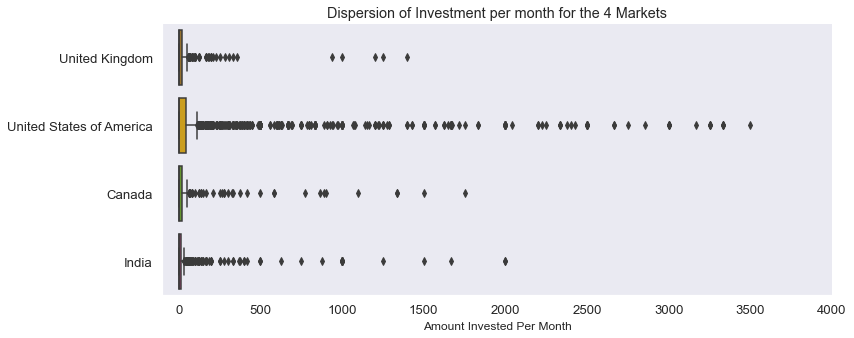

In [28]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 5))
sns.boxplot(ax = ax, y = "CountryLive", data = fcc_survey_filtered, x = "InvestPerMonth")
ax.set_ylabel("") #"Markets", fontsize = "large")
ax.set_xlabel("Amount Invested Per Month", fontsize = "large")
ax.set_title("Dispersion of Investment per month for the 4 Markets", fontsize = "x-large")
ax.set_xlim(-100, 4000)
sns.despine()
plt.show()

In [29]:
pd.DataFrame({"% of Surveyees": fcc_survey_filtered.CountryLive.value_counts(normalize = True).mul(100).astype(int)})

,% of Surveyees
United States of America,74
India,11
United Kingdom,7
Canada,6


## Conclusion Time! - Choosing the Two Best Markets

### First is USA, Which is the second one?

The E-Company follows a monthly subscription model, priced at 59 USD as per month. USA stands out as the clear choice for E-Company to invest in advertisement campaign.

Coming to the question of second market, following observations need to be considered:
- there were more participants from UK (7%) than Canada(6%), however coders from UK are willing to spend less than the base price of subscription. - So UK as a market can be dropped from this contest.


- between the remaining two markets, Canada and India, India has shown higher percentage of coders(11%) participating in the survey, as compared to Canada(6%). 


- the average amount to be spent by India is lesser than that of Canada, but it is still competent. also, it is higher than the base price of subscription model. - Both these factors make investing in India as economic as in Canada.


- also the rapidly increasing market potential of various industries in India, support for higher innovation and digitalization by the government policies, make compelling reasons for upskill of current, or skill development for future workforce.

### What can be done for Second one?

It would be prudent to decide between India and Canada based on so close competitive results. Few options that the E-Company can do: 

- Select USA and Canada with higher potential for spending but loose on a larger potential consumer base.
- Select USA and India with a mix of high and low spending but loose on a willing to afford consumer base.
- Select USA as clear choice, and create small test-campaigns for Canada and India. Take the results of these small campaigns into further considerations and then decide the second market.
- Select all the 3 - USA, Canada and India, divide the budget proportionately and start teaching!